In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
%matplotlib widget

# Initialise from temperature and density profiles

In [2]:
import sys
sys.path.insert(1,'..')
import numpy as np
import SIKE

temp = np.linspace(1,10,50) # Temperature profile in eV
dens = 1e19 * np.ones(50)   # Density profile in m^-3
elements = ['Li']

r = SIKE.SIKERun(Te=temp, ne=dens, opts={"modelled_impurities": elements})

r. run()

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling Maxwellian transition matrix for Li...
 100.0%
Computing densities with Maxwellian electrons for Li...
Evolving with: ibcgs , preconditioner:  bjacobi
TIMESTEP 1000 | max(dn/dt) 7.83e+18 | NUM_ITS 2            
Conservation check on rank 0: -1.43e-07


# Initialise from electron distributions

In [8]:
import sys
sys.path.insert(1,'..')
import numpy as np
import SIKE
import SIKE_tools

num_x = 100
T_hot = 100 * np.ones(num_x)        # Constant hot tail profile (eV)
T_bulk = np.geomspace(0.1,50,num_x) # Bulk temperature profile (eV)
n_tot = 1e19 * np.ones(num_x)       # Constant total density profile (m^-3)
hot_frac = 0.001                    # Hot tail is 0.1% of total density

vgrid = SIKE_tools.default_vgrid
fe = SIKE_tools.get_bimaxwellians(hot_frac * n_tot, (1 - hot_frac) * n_tot, T_hot, T_bulk, vgrid, normalised=False)

elements = ['Li']

r = SIKE.SIKERun(fe=fe, vgrid=vgrid, opts={"modelled_impurities": elements,
                                           "kinetic_electrons": True,
                                           "maxwellian_electrons": True})
r.run()

Initialising the impurity species to be modelled...
 Initialising states...
 Initialising transitions...
  Loading transitions from json...
  Creating transition objects...
  Creating data for inverse transitions...
  Performing checks on transition data...
 Initialising densities...
 Finalising states...
Finished initialising impurity species objects.
Filling kinetic transition matrix for Li...
 100.0%
Computing densities with kinetic electrons for Li...
Evolving with: ibcgs , preconditioner:  bjacobi
TIMESTEP 700 | max(dn/dt) 1.82e+18 | NUM_ITS 3            
Conservation check on rank 0: 4.04e-03
Filling Maxwellian transition matrix for Li...
 100.0%
Computing densities with Maxwellian electrons for Li...
Evolving with: ibcgs , preconditioner:  bjacobi
TIMESTEP 840 | max(dn/dt) 1.83e+18 | NUM_ITS 3            
Conservation check on rank 0: 5.89e-04


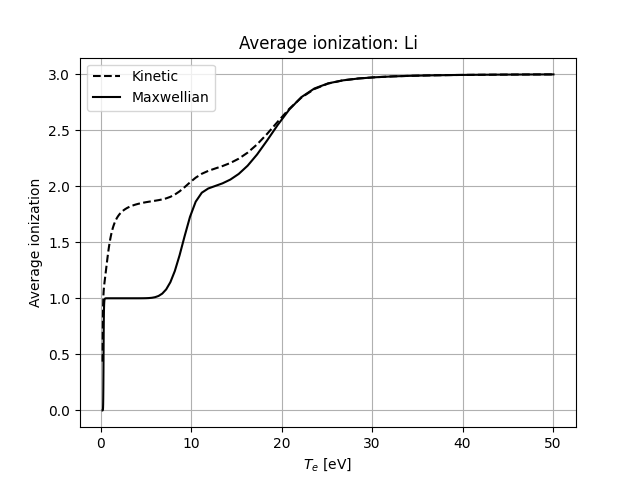

In [9]:
from SIKE_plotting import *

plot_Zavg(r,'Li',log=True)